<a href="https://colab.research.google.com/github/inggitrestuillahi/Fuzzy-Logic/blob/main/Tugas_Pengantar_AI_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Fikri Maulana dan Inggit Restu



**Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Memasukkan file excel kedalam source code**

In [ ]:
url = "/content/bengkel.xlsx"
data_bengkel = pd.read_excel(url)
data_bengkel.columns = ["id", "servis", "harga"]
data_bengkel.head(10)

,id,servis,harga
0,1,58,7
1,2,54,1
2,3,98,2
3,4,52,4
4,5,11,4
5,6,59,10
6,7,61,8
7,8,30,10
8,9,45,1
9,10,36,9


**Fungsi Keanggotaan Untuk Mendefinisikan Harga Bengkel**

Terdapat 4 tipe harga bengkel:

-Murah

-Biasa

-Mahal

-Sangat Mahal

In [ ]:
def murah(harga):
  if harga <= 3:
    return 1
  if harga > 3 and harga < 4:
    return -(harga - 4) / (4 - 3)
  elif harga >= 4:
    return 0

def biasa(harga):
  if harga > 3 and harga < 4 :
    return (harga - 3) / (4 - 3)
  if harga >= 4 and harga <= 5:
    return 1
  if harga > 5 and harga < 7:
    return -(harga - 7) / (7 - 5)
  elif harga <= 3 or harga >= 7:
    return 0

def mahal(harga):
  if harga > 5 and harga < 7:
    return (harga - 5) / (7 - 5)
  if harga >= 7 and harga <= 8:
    return 1
  if harga > 8 and harga < 9:
    return -(harga - 9) / (9 - 8)
  elif harga <= 5 or harga >= 9:
    return 0

def sangat_mahal(harga):
  if harga >= 9:
    return 1
  if harga > 8 and harga < 9:
    return (harga - 8) / (9 - 8)
  elif harga <= 8:
    return 0

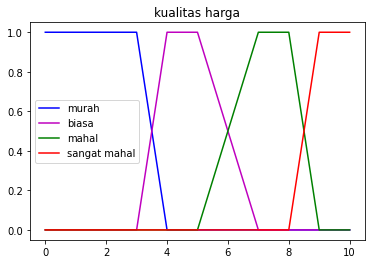

In [ ]:
value = range(11)

plt.plot(value, [murah(x) for x in value], 'b')
plt.plot(value, [biasa(x) for x in value], 'm')
plt.plot(value, [mahal(x) for x in value], 'g')
plt.plot(value, [sangat_mahal(x) for x in value], 'r')
plt.title("kualitas harga")

plt.plot(0,0, 'b', label="murah")
plt.plot(0,0, 'm', label="biasa")
plt.plot(0,0, 'g', label="mahal")
plt.plot(0,0, 'r', label="sangat mahal")
plt.legend()
plt.show()


**Fungsi Keanggotaan Untuk Mendefinisikan Servis Bengkel**

Terdapat 4 tipe servis bengkel:

-Buruk

-Cukup

-Bagus

-Sangat Bagus

In [ ]:
def buruk(servis):
  if servis <= 30:
    return 1
  if servis > 30 and servis < 40:
    return -(servis - 40) / (40 - 30)
  elif servis >= 40:
    return 0

def cukup(servis):
  if servis > 30 and servis < 40 :
    return (servis - 30) / (40 - 30)
  if servis >= 40 and servis <= 60:
    return 1
  if servis > 60 and servis < 70:
    return -(servis - 70) / (70-60)
  elif servis <= 30 or servis >= 70:
    return 0

def bagus(servis):
  if servis > 60 and servis < 70:
    return (servis - 60) / (70 - 60)
  if servis >= 70 and servis <= 80:
    return 1
  if servis > 80 and servis < 90:
    return -(servis - 90) / (90 - 80)
  elif servis <= 60 or servis >= 90:
    return 0

def sangat_bagus(servis):
  if servis >= 90:
    return 1
  if servis > 80 and servis < 90:
    return (servis - 80) / (90 - 80)
  elif servis <= 80:
    return 0

**Tahap Fuzzifikasi Harga dan Servis**

In [ ]:
def fuzzifikasi_harga(nilai_harga):
  bengkel_set = {}
  bengkel_set['murah'] = murah(nilai_harga)
  bengkel_set['biasa'] = biasa(nilai_harga)
  bengkel_set['mahal'] = mahal(nilai_harga)
  bengkel_set['sangat mahal'] = sangat_mahal(nilai_harga)
  return bengkel_set

def fuzzifikasi_servis(nilai_servis):
  service_set = {}
  service_set['buruk'] = buruk(nilai_servis)
  service_set['cukup'] = cukup(nilai_servis)
  service_set['bagus'] = bagus(nilai_servis)
  service_set['sangat bagus'] = sangat_bagus(nilai_servis)
  return service_set


**Tahap Inferensi dan Disjunction/Conjunction**

In [ ]:
def inferensi(bengkel_set, service_set):
  inference_set = {'direkomendasikan': [], 'sedang': [], 'tidak direkomendasikan': []}

  inference_set['direkomendasikan'].append(min(bengkel_set['murah'],service_set['sangat bagus']))
  inference_set['direkomendasikan'].append(min(bengkel_set['murah'],service_set['bagus']))
  inference_set['sedang'].append(min(bengkel_set['murah'],service_set['cukup']))
  inference_set['tidak direkomendasikan'].append(min(bengkel_set['murah'],service_set['buruk']))

  inference_set['direkomendasikan'].append(min(bengkel_set['mahal'],service_set['sangat bagus']))
  inference_set['sedang'].append(min(bengkel_set['mahal'],service_set['bagus']))
  inference_set['sedang'].append(min(bengkel_set['mahal'],service_set['cukup']))
  inference_set['tidak direkomendasikan'].append(min(bengkel_set['mahal'],service_set['buruk']))

  inference_set['sedang'].append(min(bengkel_set['biasa'],service_set['sangat bagus']))
  inference_set['sedang'].append(min(bengkel_set['biasa'],service_set['bagus']))
  inference_set['tidak direkomendasikan'].append(min(bengkel_set['biasa'],service_set['cukup']))
  inference_set['tidak direkomendasikan'].append(min(bengkel_set['biasa'],service_set['buruk']))

  inference_set['tidak direkomendasikan'].append(min(bengkel_set['sangat mahal'],service_set['sangat bagus']))
  inference_set['tidak direkomendasikan'].append(min(bengkel_set['sangat mahal'],service_set['bagus']))
  inference_set['tidak direkomendasikan'].append(min(bengkel_set['sangat mahal'],service_set['cukup']))
  inference_set['tidak direkomendasikan'].append(min(bengkel_set['sangat mahal'],service_set['buruk']))

  inference_set['direkomendasikan'] = max(inference_set['direkomendasikan'])
  inference_set['sedang'] = max(inference_set['sedang'])
  inference_set['tidak direkomendasikan'] = max(inference_set['tidak direkomendasikan'])

  return inference_set

**Tahap Defuzzication**

In [ ]:
def defuzzifikasi(inference_set):
    numerator, denominator = 0, 0
    defuz_set = {"direkomendasikan": 100, "sedang": 70, "tidak direkomendasikan": 50}

    for i in defuz_set.keys():
      numerator += inference_set[i] * defuz_set[i]
      denominator += inference_set[i]
    return numerator/denominator

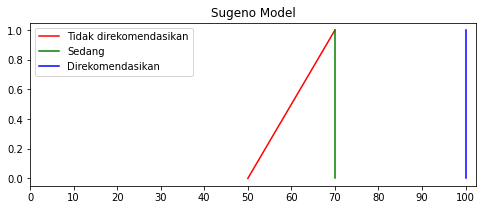

In [ ]:
plt.figure(figsize=(8, 3))
plt.title("Sugeno Model")

plt.plot([50, 70], [0, 1], label= "Tidak direkomendasikan", color = 'r')
plt.plot([70, 70], [0, 1], label="Sedang", color = 'g')
plt.plot([100, 100], [0, 1], label="Direkomendasikan", color = 'b')
plt.xticks(np.arange(0, 101, 10.0))
plt.legend()
plt.show()

**Main Program**

In [ ]:
hasil_defuz = []

def fuzzy_system(data_bengkel):
  for i in range (len(data_bengkel)):
    bengkel = fuzzifikasi_harga(data_bengkel['harga'][i])
    service = fuzzifikasi_servis(data_bengkel['servis'][i])
    print(bengkel, service)
    inference_set = inferensi(bengkel, service)
    print(inference_set)
    result = defuzzifikasi(inference_set)
    print(result)
    hasil_defuz.append(result)

  return hasil_defuz

data = fuzzy_system(data_bengkel)
data_bengkel['hasil'] = data

{'murah': 0, 'biasa': 0, 'mahal': 1, 'sangat mahal': 0} {'buruk': 0, 'cukup': 1, 'bagus': 0, 'sangat bagus': 0}
{'direkomendasikan': 0, 'sedang': 1, 'tidak direkomendasikan': 0}
70.0
{'murah': 1, 'biasa': 0, 'mahal': 0, 'sangat mahal': 0} {'buruk': 0, 'cukup': 1, 'bagus': 0, 'sangat bagus': 0}
{'direkomendasikan': 0, 'sedang': 1, 'tidak direkomendasikan': 0}
70.0
{'murah': 1, 'biasa': 0, 'mahal': 0, 'sangat mahal': 0} {'buruk': 0, 'cukup': 0, 'bagus': 0, 'sangat bagus': 1}
{'direkomendasikan': 1, 'sedang': 0, 'tidak direkomendasikan': 0}
100.0
{'murah': 0, 'biasa': 1, 'mahal': 0, 'sangat mahal': 0} {'buruk': 0, 'cukup': 1, 'bagus': 0, 'sangat bagus': 0}
{'direkomendasikan': 0, 'sedang': 0, 'tidak direkomendasikan': 1}
50.0
{'murah': 0, 'biasa': 1, 'mahal': 0, 'sangat mahal': 0} {'buruk': 1, 'cukup': 0, 'bagus': 0, 'sangat bagus': 0}
{'direkomendasikan': 0, 'sedang': 0, 'tidak direkomendasikan': 1}
50.0
{'murah': 0, 'biasa': 0, 'mahal': 0, 'sangat mahal': 1} {'buruk': 0, 'cukup': 1, 'ba

In [ ]:
data_bengkel = data_bengkel.sort_values(by="hasil", ascending=False)
data_bengkel = data_bengkel.head(10)

data_bengkel["id"].to_excel("peringkat.xls", index=False, header=False)
data_bengkel

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  after removing the cwd from sys.path.


,id,servis,harga,hasil
90,91,98,3,100.000000
51,52,94,3,100.000000
2,3,98,2,100.000000
91,92,83,3,100.000000
16,17,70,3,100.000000
12,13,80,3,100.000000
43,44,63,2,79.000000
15,16,82,6,78.571429
74,75,61,1,73.000000
54,55,50,7,70.000000
